In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Hands-on Introduction to Deep Learning (Lecture 1)
<font color="red"><b>Under construction!!</b></font>

The **prereqs** are kept (on purpose) to a minimum, i.e.:
- Basic knowledge of <font color="blue"><b>derivatives and the chain rule</b></font>.
- Ability to perform <font color="blue"><b>simple matrix operations</b></font> (multiplication, transpose,..).
- Knowledge of <a href="https://www.python.org">Python</a> and <a href="https://www.numpy.org">NumPy</a>.<br>
  CHPC provides courses on these topics. You can find them at:<br>
  + <a href="https://github.com/chpc-uofu/python-lectures">Introduction to Python</a>
  + <a href="https://github.com/chpc-uofu/intro-numpy">Introduction to NumPy & SciPy</a>

Note:<br>
- If you want to know/investigate the mathematical details of DL, feel free to ask me (wim.cardoen@utah.edu). <br>
  We can discuss these topics outside this lecture.

Sketch of the introduction (<font color="red"><b> To be elaborated further</b></font>)

* What is AI? What are some of the approaches: logic, rule-based methods,...
* What is ML?
* Difference between supervised learning, semi-supervised and unsupervised learning.
  Give an examples of each of them.
* Deeplearning: in essence an old idea but why did it take off the last few years?
  - Amount of available data
  - Advent of GPUs which are perfect for this approach

# 2. The concept of a neuron/perceptron

A neuron:
- fundamental unit of the nervous system
- <font color="red"><b>find a schematic picture in physiology book</b></font> (dendrites, axon and cell nucleus).
- give rise to the concept of perceptron (Rosenblatt, 1957)
  
In essence, a <font color="green"><b>perceptron</b></font> is a **non-linear function** $f$ 
(<font color="green"><b>activation function</b></font>)<br>
which operates on an input and returns an output.

Or mathematically, $\textbf{y}=f(\textbf{x})$, where:
* $f$: non-linear/activation function
* $\textbf{x} \in \mathbb{R}^{n_1 \times 1}$: input vector i.e. $\textbf{x}:=(x_1,x_2,\ldots, x_{n_1})^T$.
* $\textbf{y} \in \mathbb{R}^{n_2 \times 1}$: output vector i.e. $\textbf{y}:=(y_1,y_2,\ldots, y_{n_2})^T$.

In what follows we will perform 
<font color="green"><b>logistic regression</b></font> (<font color="orangered">ones of the most simple neural net possible</font>) on a simple data set. <br>This simple toy model/example will allow us:
* to show the <b>essential features</b> of deep learning.
* to easily transition to the <b>general case</b>.

# 3.Logistic Regression (as the most simple neural net!)

## 3.1. Goal/Task

* To train a <font color="green"><b>binary classifier</b></font> based on a given training set
  <br>and **one perceptron** (<font color="green"><b>one unit</b></font>) in just <font color="green"><b>one layer</b></font>.
* To obtain the <font color="green"><b>accuracy</b></font> of the trained model using a test set.
* To <font color="green"><b>predict</b></font> the outcome of some data (provided) using the model.
* To get familiar with some DL net frameworks.

## 3.2.Training of the binary classifier

The <font color="green"><b>training</b></font> of a binary classifier (and <font color="orangered">in extenso a deep neural net</font>) 
consists of the following steps:
* **Initialize** the <font color="green"><b>parameters</b></font> (<font color="green"><b>weight vector and bias</b></font>)
* Perform an **iterative loop** over the following 2 substeps:

  + <font color="green"><b>Forward propagation</b></font>:<br>
    Given a training set, and a set of <font color="green"><b>parameters</b></font> (weight vector and bias)
    we calculate the associated cost function,
    which is a measure how different the predicted data are from the true data.

  + <font color="green"><b>Back propagation</b></font>:<br>
    Based on the cost function we perform an <font color="green"><b>update</b></font> on the set of<br> parameters (weight vector and bias)
    in order to <font color="green"><b>lower</b></font> the cost.
 

The <font color="green"><b>training set</b></font> consists of $m_{\mathrm{train}}$ data points</b>:<br> $(\mathbf{x}_i,y_i)$, $i \in \{1,\ldots,m_{\mathrm{train}}\}$<br>
  where:
  - $\mathbf{x_i}$ is a column vector of length of $n$, i.e. $\mathbf{x_i} \in \mathbb{R}^{n \times 1}$.<br>
    Each dimension of the vector $\mathbf{x_i}$ represents a <font color="green"><b>feature</b></font> ($\Rightarrow$ n features).
  - $y_i$ is either 0 ($\texttt{False}$) or 1 ($\texttt{True}$), i.e. $y_i \in \mathbb{R}$.
    

### 3.2.1. Forward Propagation

* At the perceptron (only $\mathbf{1}$!), each data point $i$ ($i \in \{1,\ldots,m_{\mathrm{train}}\}$) will be<br>
  subjected to the following $2$ transformations:
  1. $\texttt{affine}$ transformation:<br>
       $\begin{eqnarray}
         z_i & = &   \mathbf{w^T}.\mathbf{x_i} +b \;\;,\;\; \mathbf{x_i} \in \mathbb{R}^{n\times 1}\\
            &=  &  \displaystyle{\sum_{j=1}^n w_j x_{ji} +b}
        \end{eqnarray}$
    
     where:<br>
     - $ \mathbf{w}$ : <font color="green"><b>weight</b></font> vector ($\in \mathbb{R}^{n \times 1}$)<br>
       Note: the weight vector has <font color="orangered">same number of dimensions as there are features</font> .
    
     - $ b$ : <font color="green"><b>bias</b></font> (scalar $\Rightarrow \in \mathbb{R}$).

     - For each data point: the <font color="orangered"> weight vector and bias used at this one perceptron are the same</font>.   
  2. subsequent $\texttt{non linear activation}$:<br>
     $a_i =  \sigma(z_i)$ , $a_i \in \mathbb{R}$<br>
     where:<br>
     - $\sigma$ is known as the <font color="green"><b>sigmoid</b></font> function.
   
     - $\begin{equation}
        \sigma(z) = \displaystyle \frac{1}{1+e^{-z}}
       \end{equation}$
    
     - The activation of the <b>last layer</b> (in this case we only have one layer) is the same<br>
       as the predicted value ($\widehat{y_i})$. Thus, <br>
    
       $\begin{equation}
       \widehat{y_i} := a_i
       \end{equation}$
   
* Calculate the <font color="green"><b>cost function</b></font> ($\mathcal{C}$).<br>
  The cost function $\mathcal{C}$ is defined as the mean of the <font color="green"><b>loss functions</b></font> ($\mathcal{L}^{(i)}$) over the $m_{\mathrm{train}}$ data points:

  $\begin{eqnarray}
       \mathcal{C}       & := & \displaystyle \frac{1}{m_{\mathrm{train}}} \sum_{i=1}^{m_{\mathrm{train}}}        \mathcal{L}^{(i)} 
  \end{eqnarray}$
  

  In case of **binary classification**, the **loss function** $\mathcal{L}^{(i)}$ for data point $i$ is given by:
  
  $\begin{eqnarray}
       \mathcal{L}^{(i)} & = & - \bigg [ y_i \log(\widehat{y_i}) + (1-y_i)\log(1-\widehat{y_i}) \bigg ] \\
                         & = & - \bigg [ y_i \log(a_i) + (1-y_i)\log(1-a_i) \bigg ] \\
  \end{eqnarray}$


#### Some notes on the sigmoid function

The sigmoid function $\sigma(z)$ has the following properties:

* $
   \begin{equation}
  \lim_{ z \to -\infty} \sigma(z) = 0
  \end{equation}$

* $\begin{equation}
   \lim_{ z \to +\infty} \sigma(z) = 1
  \end{equation}$

* $\begin{equation}
   \sigma(0) = \frac{1}{2}
  \end{equation}$

* $\begin{equation}
  \displaystyle \frac{d \sigma(z)}{dz} = \sigma(z)(1-\sigma(z))
  \end{equation}$

The range of the sigmoid is $[0,1]$ and thus be interpreted as a <font color="green"><b>probability</b></font>.
  

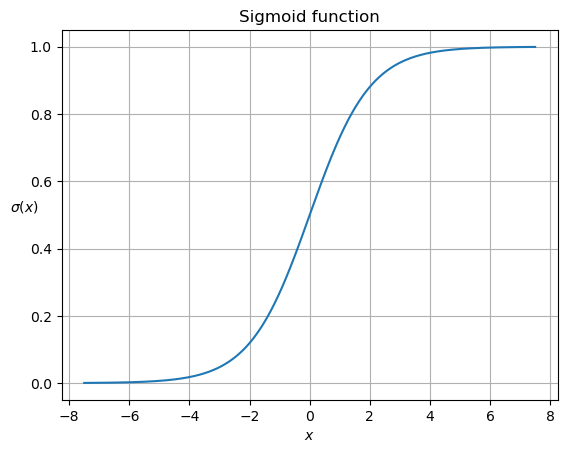

In [23]:
x = np.linspace(-7.5, 7.5, 1501)
y = 1.0/(1.0+np.exp(-x))
plt.title(r"Sigmoid function")
plt.xlabel(r"$x$")
plt.ylabel(r"$\sigma(x)$",rotation=0)
plt.plot(x,y)
plt.grid()
plt.show()

#### Exercise 1: Implementation of the tools for the forward propagation

**Implement** the following functions:
- a. <font color="green"><b>def init(n: float, m: float) -> np.ndarray, float:</b></font><br>
     Returns the initialized weight vector and bias, i.e. (Weight, bias)
- b. <font color="green"><b>def sigmoid(z: np.ndarray) -> np.ndarray:</b></font><br>
     Returns the sigmoid function applied to each el. of z.
- c. <font color="green"><b>def forward(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray, float</b></font>: <br>
     Returns the activation matrix and the cost , i.e. (A,cost)

<font color="red"><b>To be worked out further</b></font>  

### 3.2.2. Back Propagation

Our ultimate goal (during the training phase of our model) is to find the <font color="green"><b>optimal values</b></font><br> for the weight vector ($\widehat{w}$), and the bias ($\widehat{b}$).<br>
  Thus:<br>

  $\begin{equation}
     \widehat{w}, \widehat{b} = \underset{w,b}{\operatorname{argmin}} \mathcal{C}
  \end{equation}$

This goal can be reached iteratively:
1. by calculating the <font color="green"><b>direction/gradient</b></font> w.r.t weights and bias which leads to a minimum of the cost function $\mathcal{C}$).
2. by subsequently <font color="green"><b>updating</b></font> the values of the weight vector and the bias along the aforementioned direction.

1.Calculate the **gradient of cost function** w.r.t the weights and the bias:
  
  + $\begin{eqnarray}
      \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} & = & \frac{\partial}{\partial a_i} \bigg [ - \big [ y_i \log(a_i) + (1-y_i)\log(1-a_i) \big ] \bigg ]\\
                                                      & = & -\frac{y_i}{a_i} + \frac{(1-y_i)}{(1-a_i)}
    \end{eqnarray}$
 
    
  + $\begin{eqnarray}
        \frac{\partial \mathcal{L}^{(i)}}{\partial z_i} & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial a_i}{\partial z_i} \\
         & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial \sigma(z_i)}{\partial z_i} \\
         & =& a_i - y_i
    \end{eqnarray}$
 
    
  + $\begin{eqnarray}
       \frac{\partial \mathcal{L}^{(i)}}{\partial b} & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial a_i}{\partial z_i}\frac{\partial z_i}{\partial b} \\
                 & = & a_i - y_i
    \end{eqnarray}$
  + $\begin{eqnarray}
      \frac{\partial \mathcal{L}^{(i)}}{\partial w_j} & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial a_i}{\partial z_i}\frac{\partial z_i}{\partial w_j} \\
                 & = & (a_i - y_i) x_{ji}
    \end{eqnarray}$
    
  Thus, <br>

  + $\begin{eqnarray}
     \frac{\partial\mathcal{C}}{\partial b}  & =   &= & \frac{1}{m_{\mathrm{train}}}\displaystyle \sum_{i=1}^{m_{\mathrm{train}}} \frac{\partial \mathcal{L}^{(i)}}{\partial b}  
                                             & = & \frac{1}{m_{\mathrm{train}}} \displaystyle \sum_{i=1}^{m_{\mathrm{train}}} (a_i - y_i) 
     \end{eqnarray}$

  + $\begin{eqnarray}
     \frac{\partial\mathcal{C}}{\partial w_j}  &= & \frac{1}{m_{\mathrm{train}}}\displaystyle \sum_{i=1}^{m_{\mathrm{train}}} \frac{\partial \mathcal{L}^{(i)}}{\partial b} 
      & = & \frac{1}{m_{\mathrm{train}}} \displaystyle \sum_{i=1}^{m_{\mathrm{train}}} (a_i - y_i) x_{ji} \;\;,\;\;\forall \, j \in \{1,\ldots,n\}
     \end{eqnarray}$

2.**Update** the parameters (using <a href="https://en.wikipedia.org/wiki/Gradient_descent">gradient descent</a>): 

  $\begin{eqnarray}
      b & = & b - \alpha  \frac{\partial\mathcal{C}}{\partial b} \\
      w_j & = & w_j - \alpha  \frac{\partial\mathcal{C}}{\partial w_j} \;\;,\;\;\forall \, j \in \{1,\ldots,n\}
    \end{eqnarray}$

  where $\alpha$ is known as the <font color="green"><b>learning rate </b></font> or the <font color="green"><b>step size</b></font> (gradient descent).  

#### Exercise 2: Implement the Back propagation tools

**Implement** the following functions:

* a.<font color="green"><b>def backward(A:np.ndarray, X_train:np.ndarray, Y_train:np.ndarray) -> np.ndarray, float:</b></font><br>
    Returns the tuple of gradients: (dWeights,dbias)
  
* b.<font color="green"><b>def update(Weights: np.ndarray, Bias: float, dWeight: np.ndarray, dbias:float, lr:float) -> np.ndarray, float:       </b></font><br>
    Returns the update tuple: (weight,bias)

<font color="red"><b>To be worked out further</b></font> 

#### Exercise 3: Training (complete)

**Implement** the following function:

- a. <font color="green"><b>def training(X_train: nd.array, Y_train: nd.array, lr:float, niter: int) -> nd.array, float:</b></font><br>
    Returns the optimized weight vector and bias

<font color="red"><b>To be worked out further</b></font>  


## 4. Testing of the binary classifier 

Once our neural net has been trained, i.e. the <font color="green"><b>optimal values</b></font><br> 
for the parameters $\mathbf{w}$ and $b$ (i.e. $\mathbf{\widehat{w}}$ and $\widehat{b}$) are known. <br> 
We can now test our neural net model using the <font color="green"><b>test data set</b></font>.

* Apply the <font color="green"><b> predict </b></font> function the **test data set**.<br>
  The **predict** function has $2$ components:
  + Apply the **forward** propagation to the test data set but use $\mathbf{\widehat{w}}$ and $\widehat{b}$.
  + Map the obtained activation to either $0$ or $1$
* Calculate the number of correct predictions vs. total predictions. 

### 4.1.Prediction function

* The <font color="green"><b>test set</b></font> consists of $m_{\mathrm{test}}$ test data points</b>:<br> $(\mathbf{x}_i,y_i)$, $i \in \{1,\ldots,m_{\mathrm{test}}\}$<br>
  where:
  - $\mathbf{x_i}$ is a column vector of length of $n$, i.e. $\mathbf{x_i} \in \mathbb{R}^{n \times 1}$.
  - $y_i$ is either 0 ($\texttt{False}$) or 1 ($\texttt{True}$), i.e. $y_i \in \mathbb{R}$.
  - These $m_{\mathrm{test}}$ $\mathbf{x_i}$ column vectors can be collected in the matrix $X$,<br>
    given by:

    $\begin{eqnarray}
         X & = & \begin{pmatrix}
                                \vdots & \cdots  &\vdots \\
                                 \mathbf{x_1}   & \vdots  & \mathbf{x_{\mathrm{m_{test}}}}  \\
                                 \vdots & \cdots & \vdots 
                 \end{pmatrix}
     \end{eqnarray}$
    
* Apply <font color="green"><b>forward propagation</b></font> in (matrix) form (efficiency reasons):
  - $\begin{eqnarray}
        \mathbf{z^T} & = & \mathbf{\widehat{w}^T}. \mathbf{X} + \mathbf{\widehat{b}^T} 
     \end{eqnarray}$
     where:
     + $\mathbf{z^T}$ is a row vector of length $m_{\mathrm{test}}$
     + $\mathbf{\widehat{w}^T}$ is a row vector (containing $n$ el.) with the optimal weights (obtained from the training)
     + $\mathbf{X}$ is $n \times m_{\mathrm{test}}$ matrix.
     + $\mathbf{\widehat{b}^T}$ is a row vector of length $m_{\mathrm{test}}$ (each element is $\widehat{b}$).
  - $\begin{eqnarray}
        \mathbf{a^T} & = & \sigma(\mathbf{{z}^T}) 
     \end{eqnarray}$
    where $\sigma$ operates element-wise on the row-vector $\mathbf{z}^T$<br>
    to generate the row vector $\mathbf{a}^T$.
* The elements that are predicted ($\mathbf{a}^T$) are in the interval $[0,1]$.<br>
  In order to compare them with the true values, we need to <font color="green"><b>map</b></font> the elements of $\mathbf{a}^T$ into $\{0,1\}$.<br>
  in the following way:<br>
  $\begin{equation}
    \widehat{y_i}= 
\begin{cases}
    1,& \text{if } a_i > 0.5\\
    0,              & \text{otherwise}
\end{cases}
 \end{equation}$

#### Exercise 4: prediction function + accuracy

**Implement** the following functions:

* a.<font color="green"><b>def predict(X_test: np.ndarray, Weights: np.ndarray, bias:float) -> np.ndarray:</b></font><br>
  Returns the Y_pred vector

* b.<font color="green"><b>def accuracy(Y_test: np.ndarray, Y_pred: np.ndarray) -> float:</b></font><br>
  Returns the accuracy

<font color="red"><b>To be worked out further</b></font>

## 5. Putting it all together

Things to be discussed:
* Generation of the data set.
  + Code provided by me to generate a random data set on which to perform
    binary classification
  + Split the data in 2 sets: training and testing (code provided by me)
* Training: 
  + Perform the training using the training data using code (Ex.3)
* Testing:
  + Perform the test using the test data using code (Ex.4)
  + Calculate the accuracy using code (Ex. 4)
* Visualization of the training data set & plotting of the separating plane (code provided)

<font color="red"><b>Note:</b></font><br>
* I will provide the complete code (as such) of this section (due to time constraints).
* It is more important that people play around with it to see the results.

## 6. Conclusion

Congratulations!<br>
* You have implemented the simplest neural net from scratch.
* You have learned that the training of a neural net is (in general) an iterative process 
  consisting of:
  + forward propagation
  + backward propagation
* Once the training has been done, you can test your neural net.
* You can apply your model on new data (from the same distribution)

This algorithm is the basic algorithm for **all** neural networks.


## 7.Perform the same task using PyTorch/Keras